In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.DataFrame(pd.read_csv("../assets/normalized_pyramid_data.csv"))

## Camilo's sample queries (6/26)

In [14]:
'''
df[df["dynasty"] == 3][df["exterior_material"] == "Limestone"][df["start_of_reign"] <= 2700][df["end_of_reign"] >= 2550]

df[df["superstructure_type"] == "Pyramid"]["width"]

len(df[df["royal_status"] == "King"][df["period"] == "Old Kingdom"])

df[df["dynasty"] >= 5][df["dynasty"] <= 7][df["state_of_completion"] == "Completed"]
'''

'\ndf[df["dynasty"] == 3][df["exterior_material"] == "Limestone"][df["start_of_reign"] <= 2700][df["end_of_reign"] >= 2550]\n\ndf[df["superstructure_type"] == "Pyramid"]["width"]\n\nlen(df[df["royal_status"] == "King"][df["period"] == "Old Kingdom"])\n\ndf[df["dynasty"] >= 5][df["dynasty"] <= 7][df["state_of_completion"] == "Completed"]\n'

In [15]:
kings = df[df['royal_status'] == 'King']

In [16]:
# Not sure of the point of this; Brought over from visualizations

start_reign = df["start_of_reign"].notnull()
end_reign = df["end_of_reign"].notnull()
reign_df = df[start_reign & end_reign]

In [17]:
# Find the number of queen pyramids at each complex

queens = df[df['royal_status'] == 'Queen']
queens[['royal_status', 'pyramid_complex']].groupby('pyramid_complex').count()

,royal_status
pyramid_complex,
Djedkare,1
Khentkaus I,1
Khufu,3
Menkaure,3
Neferirkare,1
Niuserre,1
Pepy I,11
Pepy II,3
Teti,3


In [18]:
# Compare the number of king and queen pyramids at each confirmed complex

key = ['unknown', 'pyramid?']
complexes = df[~df['pyramid_complex'].isin(key)]

kings_and_queens = complexes.groupby('pyramid_complex', sort=False)[['royal_status']].value_counts().unstack()
kings_and_queens.sum()

royal_status
King     25.0
Queen    28.0
dtype: float64

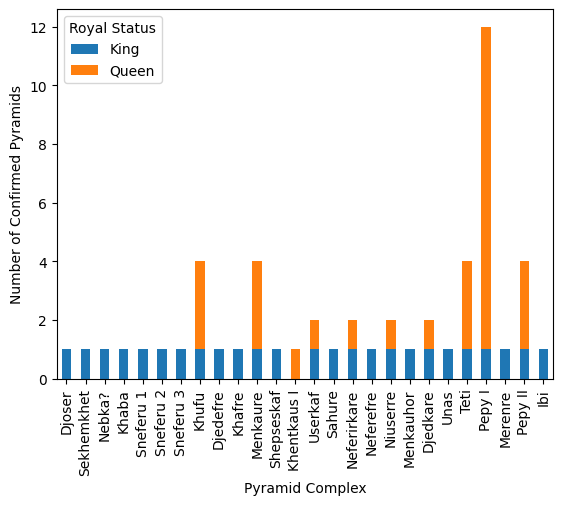

In [19]:
plot = kings_and_queens.plot.bar(xlabel='Pyramid Complex', ylabel='Number of Confirmed Pyramids', stacked=True)
plot.legend(title='Royal Status')

In [20]:
# Count all known casing types

df[df['casing'] != 'Unknown']['casing'].value_counts()

casing
Limestone             40
Limestone, Granite     6
Not Cased              2
Name: count, dtype: int64

In [21]:
# See the types of casing during each dyansty

dynasty_casing = df.groupby('dynasty')['casing'].value_counts().unstack()
dynasty_casing

casing,Limestone,"Limestone, Granite",Not Cased,Unknown
dynasty,,,,
3.0,2.0,NaN,NaN,2.0
4.0,7.0,6.0,2.0,NaN
5.0,12.0,NaN,NaN,NaN
6.0,18.0,NaN,NaN,7.0
7.0,NaN,NaN,NaN,9.0
8.0,1.0,NaN,NaN,5.0


In [22]:
# See the distribution of pyramids between royal_statuss among the dynasties

dynasty_pyramids = df.groupby('dynasty')['royal_status'].value_counts().unstack()
dynasty_pyramids

royal_status,King,Queen
dynasty,,
3.0,4.0,NaN
4.0,8.0,7.0
5.0,8.0,4.0
6.0,9.0,17.0
7.0,9.0,NaN
8.0,6.0,NaN


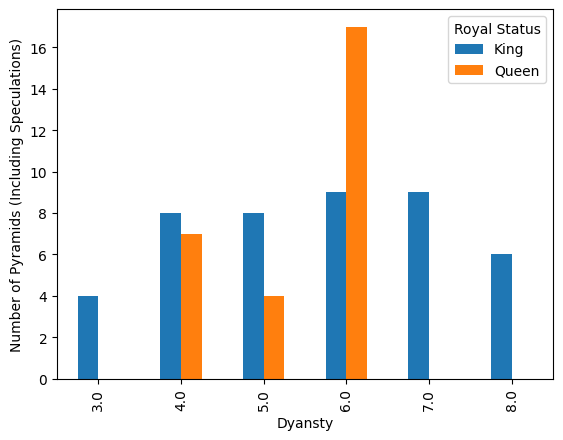

In [23]:
plot = dynasty_pyramids.plot.bar(xlabel='Dyansty', ylabel='Number of Pyramids (Including Speculations)')
plot.legend(title='Royal Status')

In [24]:
queen_data = queens[['royal_mother_title', 'likely_wife', 'wife_title', 'vizier', 'regent']]
queen_data

,royal_mother_title,likely_wife,wife_title,vizier,regent
8,False,True,True,False,False
9,False,True,False,False,False
10,False,True,True,False,False
14,False,True,True,False,False
15,False,True,False,False,False
16,False,True,False,False,False
18,True,False,False,False,True
20,True,True,True,False,False
23,True,True,True,False,False
26,False,True,True,False,False


In [25]:
queen_data.value_counts()

royal_mother_title  likely_wife  wife_title  vizier  regent
False               True         True        False   False     11
True                True         True        False   False      6
False               True         False       False   False      5
                                 True        True    False      2
True                True         True        False   True       2
                    False        False       False   False      1
                                                     True       1
Name: count, dtype: int64

/var/folders/q8/nm86scy964318ffbhmh7n8qm0000gr/T/ipykernel_3808/2019566700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[temp['pyramid_complex'] == comp]['start_of_reign'] = temp[temp['pyramid_complex'] == comp]['start_of_reign'].replace(np.nan, start)


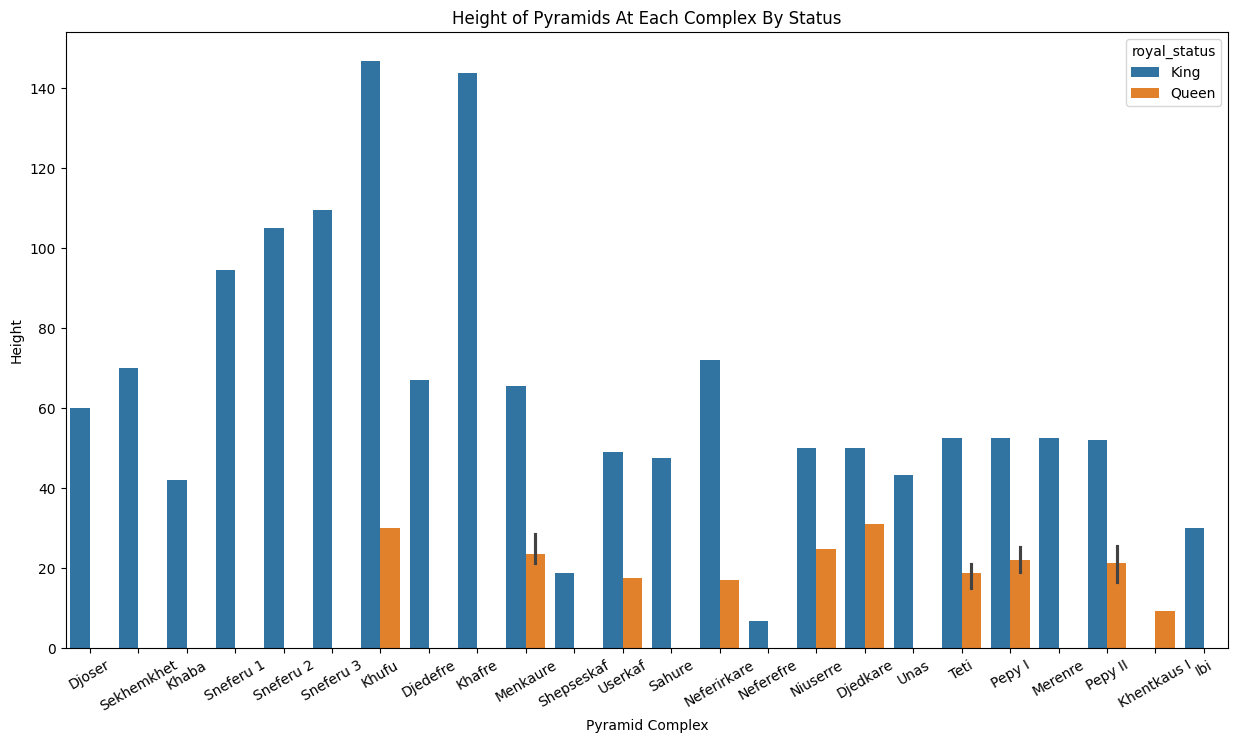

In [26]:
# Attempting to recreate George's suggested visualization (picture on my phone)

# Trying to fill 'start_of_reign' fully so that sorts work correctly
# TODO: Add this functionality to the cleanup script
unique_comp = complexes['pyramid_complex'].unique()
temp = df

for comp in unique_comp:
    start = temp[temp['pyramid_complex'] == comp]['start_of_reign'].max()
    temp[temp['pyramid_complex'] == comp]['start_of_reign'] = temp[temp['pyramid_complex'] == comp]['start_of_reign'].replace(np.nan, start)

temp.loc[temp['pyramid_complex'] == 'Sneferu 3', 'start_of_reign'] = 2574   # This had to be done to get it in the correct order (value was missing)
temp.dropna(subset='height', inplace=True)
temp.sort_values(by='start_of_reign', ascending=False, inplace=True)

# Getting the height column to be numeric
def average_of_two(val):
    if isinstance(val, int) or isinstance(val, float) or pd.isna(val): return val

    if ',' in val: return 72    # Temporary: Deals with that one weird value

    nums = val.split('-')
    if len(nums) == 1: return float(nums[0])
    return (float(nums[0]) + float(nums[1])) / 2

temp['height'] = temp['height'].map(average_of_two).astype(float)

# Trying to get the graph working
tl = temp[['pyramid_complex', 'start_of_reign', 'end_of_reign', 'length_of_reign', 'height', 'royal_status']]
plt.figure(figsize=(15,8))
plot = sns.barplot(x='pyramid_complex', 
                   y='height', 
                   data=tl, 
                   hue='royal_status')
plot.set_title('Height of Pyramids At Each Complex By Status')
plot.set_xlabel('Pyramid Complex')
plot.set_ylabel('Height')
plot.tick_params(axis='x', rotation=30)